In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table
from read_yse_ztf_snana import read_YSE_ZTF_snana_dir as snana
import pandas as pd
from astropy.io import ascii 
import os

In [2]:
full_snid_list, full_meta_list, full_df_list = snana(dir_name = 'thesis_sample')

In [3]:
for object in full_meta_list:
    print(f"{object['object_id']} has RA = {object['ra']}, DEC = {object['dec']}, and redshift z = {object['redshift']}")
    print(f"{object['object_id']} is in the galaxy {object['host_gal_name']}, identified using {object['host_gal_name_source']}")

2019wmr has RA = 146.514779, DEC = 33.528265, and redshift z = 0.038
2019wmr is in the galaxy WISEA J094603.59+333142.3, identified using (NED)
2020hgw has RA = 214.579712, DEC = 38.929525, and redshift z = 0.043
2020hgw is in the galaxy WISEA J141819.08+385545.6, identified using (NED)
2020jfo has RA = 185.460337, DEC = 4.481695, and redshift z = 0.005
2020jfo is in the galaxy MESSIER 061, identified using (NED)
2020kpz has RA = 187.731061, DEC = 9.152848, and redshift z = 0.039
2020kpz is in the galaxy WISEA J123055.30+090903.9, identified using (NED)
2020rth has RA = 52.113556, DEC = -5.254542, and redshift z = 0.0184
2020rth is in the galaxy KUG 0325-054, identified using (NED)
2020tly has RA = 7.360825, DEC = 17.485344, and redshift z = 0.058
2020tly is in the galaxy MCG +03-02-014, identified using (NED)


In [4]:
for object in full_meta_list:
    redshifts = object['redshift']
    print(redshifts)

0.038
0.043
0.005
0.039
0.0184
0.058


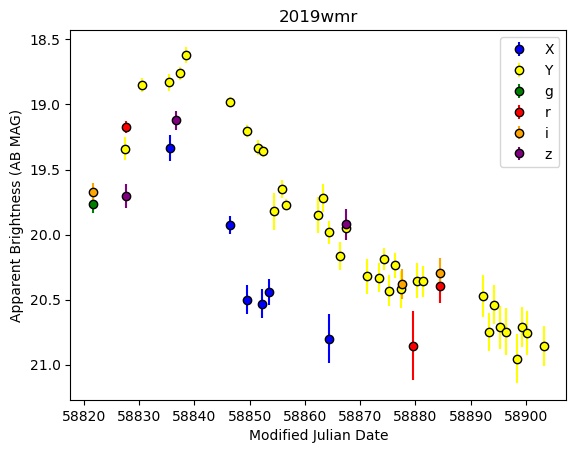

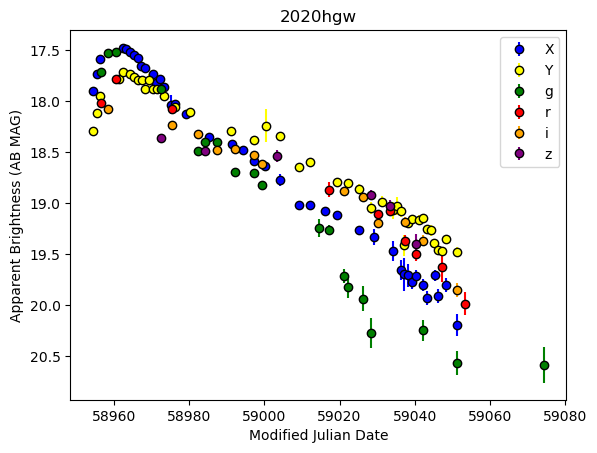

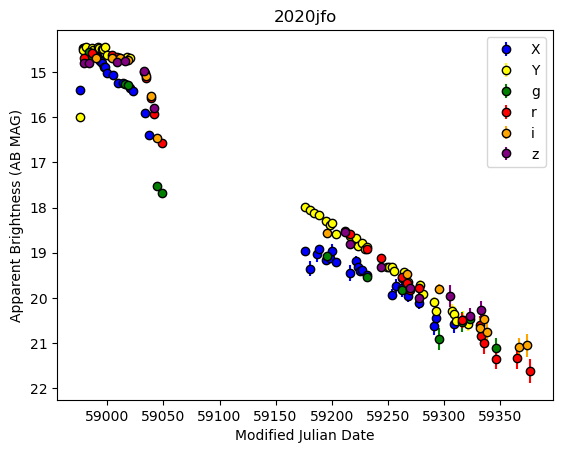

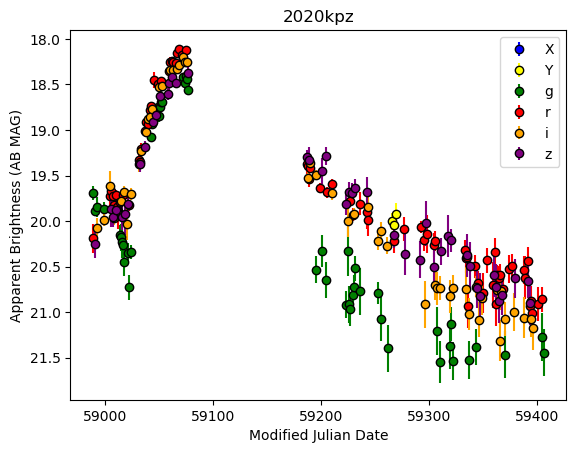

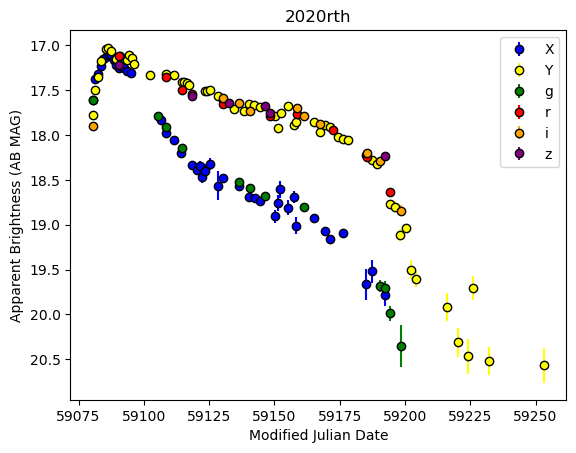

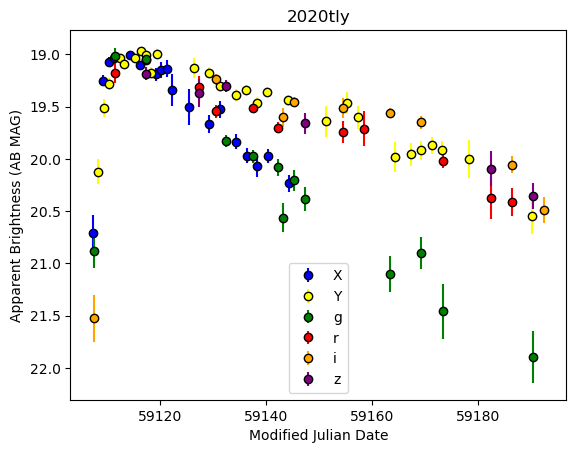

In [5]:
for idx, df in enumerate(full_df_list):
        plt.figure(idx)
        colors = {'X':'blue', 'Y':'yellow', 'g':'green', 'r':'red', 'i':'orange', 'z':'purple'}
        PAN = {}
        ZTF = {}
        for i, filt in enumerate(['X', 'Y']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            mask = mask & upperlim
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            ZTF[filt] = l
        for i, filt in enumerate(['g', 'r', 'i', 'z']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            PAN[filt] = l
        plt.gca().invert_yaxis()
        plt.title(full_snid_list[idx])
        plt.xlabel('Modified Julian Date')
        plt.ylabel('Apparent Brightness (AB MAG)')
        plt.legend()
  

In [6]:
def spectra_plot(filepath):
    files = os.listdir(os.getcwd())
    csv_files = []
    for file in files:
        if ".csv" in file:
            csv_files.append(file)
    objects = {}
    for file in csv_files:
        if "2020jfo" in file:
            continue
        object_name = file.split('-')[0]
        if object_name in objects:
            objects[object_name].append(file)
        else:
            objects[object_name] = [file]
    for object_name, csv_files in objects.items():
        plt.figure()
        for file in csv_files:
            data = ascii.read(file, format = "csv", header_start = 18, data_start = 19)
            wavelength = data['wavelength']
            flux = data['flux']
            plt.plot(wavelength, flux / np.median(flux), label = file[:-4])
        plt.legend()
        plt.xlabel(r'Wavelength ($\AA$)')
        plt.ylabel(r'Normalized flux $(erg \ s^{-1} \ cm^{-2} \ \AA)$')
        plt.title(object_name)

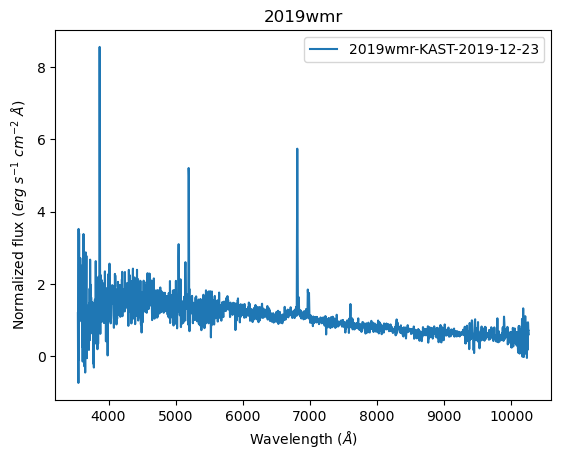

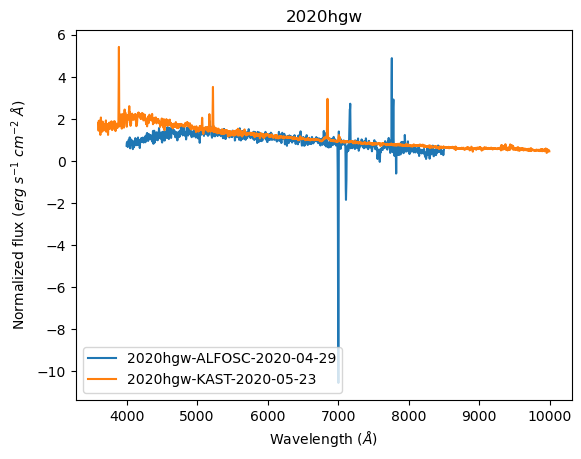

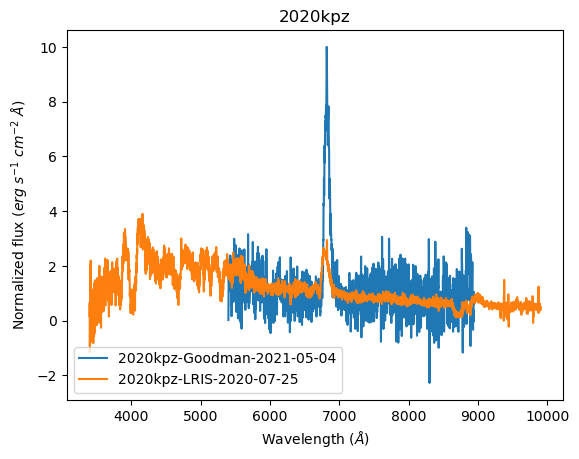

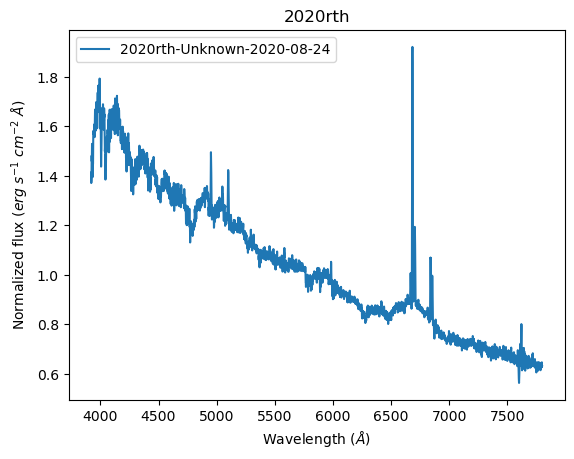

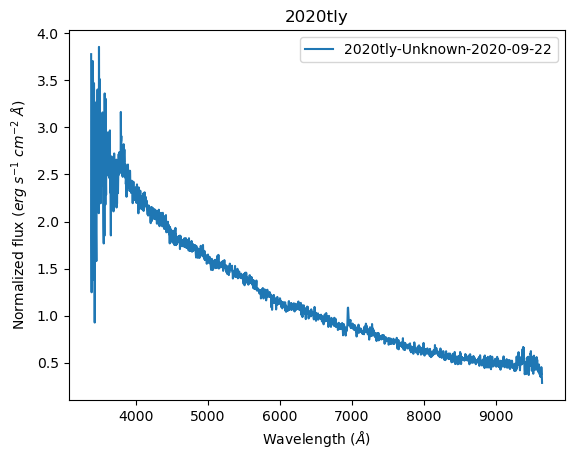

In [7]:
spectra_plot('thesis_sample')